<h1 align="center">Assignment 1</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. **[5 pts]** Download the data set **adult-modified-09-13-2025.csv** and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.


In [2]:
adult_census_df = pd.read_csv("adult-modified-09-13-2025.csv")
adult_census_df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,Public,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-employed,Bachelors,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-employed,HS-grad,9,Married,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,13,Married,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [3]:
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.0+ MB


In [4]:
# analysis of education and education-num mapping
adult_census_df.groupby("education")["education-num"].unique()

education
10th             [6]
11th             [7]
12th             [8]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Preschool        [1]
Prof-school     [15]
Some-college    [10]
Name: education-num, dtype: object

In [5]:
adult_census_df.describe(include="all")

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
count,32561,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,74,6,16,NaN,6,15,6,5,2,NaN,42,2
top,36,Private,HS-grad,NaN,Married,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,897,22696,10501,NaN,14999,4140,13193,27816,21790,NaN,29170,24720
mean,NaN,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,NaN,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


_First, I loaded the csv dataset as a dataframe using the pandas library. I used the head(10) method to view the first 10 rows of the dataframe to verify it loaded correctly. Then I used info() to examine the non-null count and datatype of each column. It showed that there were no null values, and education-num and hours-per-week have type int64, while all other columns were of object datatype. I used describe(include="all") to examine the means, standard deviations, and other statistics for the numeric attributes. For education-num, the mean of around 10 suggests that on average people had a 10th grade education level, with minimum education level being Preschool and maximum being 16 (Doctorate). The standard deviation of 2.57 shows that education-num values are on average 2.57 units away from the mean. The mean hours-per-week is around 40 hours._


#### 2. **[10 pts]** Using Pandas, compute the number of missing values for each attribute in the data. Fill the missing values for all numeric attributes using the mean value for the attribute. After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. Next, remove columns **education** and **native-country**. Show that the final resulting dataframe does not contain missing values and display the new mean and standard deviations for the numeric attributes. For the remaining parts of this assignment, you should use this new dataframe without missing values and the aforementioned columns.


In [6]:
adult_census_df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
for col in adult_census_df.columns:
    print(col)
    print(adult_census_df[col].unique())

age
['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '?' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '76' '17' '55'
 '61' '70' '64' '33' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87']
workclass
['Public' 'Self-employed' 'Private' '?' 'Without-pay' 'Never-worked']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married' 'Divorced' 'Married-spouse-absent' 'Separated'
 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support'

_Looking at the unique values from each column, we can see that '?' is used to denote missing values._


In [8]:
(adult_census_df == "?").sum()

age                 45
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
adult_census_df.replace("?", np.nan, inplace=True)
adult_census_df.isna().sum()

age                 45
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [10]:
# To replace the numerical attributes missing values using the mean, we first need to convert those columns to int
adult_census_df["age"] = adult_census_df["age"].astype(float)

In [11]:
age_mean = adult_census_df["age"].mean()
adult_census_df.fillna({"age": age_mean}, axis=0, inplace=True)

In [12]:
# drop all rows where a categorical attribute contains a missing value.
adult_census_df.drop(
    adult_census_df[adult_census_df.workclass.isnull()].index, axis=0, inplace=True
)
adult_census_df.drop(
    adult_census_df[adult_census_df.occupation.isnull()].index, axis=0, inplace=True
)
adult_census_df.drop(
    adult_census_df[adult_census_df["native-country"].isnull()].index,
    axis=0,
    inplace=True,
)

In [13]:
# remove columns education and native-country.
adult_census_df.drop(columns=["education", "native-country"], inplace=True)

In [14]:
adult_census_df.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [15]:
adult_census_df.describe()

,age,education-num,hours-per-week
count,30162.000000,30162.000000,30162.000000
mean,38.438107,10.121312,40.931238
std,13.128006,2.549995,11.979984
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


_I used the isna() method to check for missing values, but there were none initially. Upon further analysis by examining unique values in each column, I discovered that '?' was used as the placeholder for missing values. After that, I checked how many '?' values existed in each column and replaced them with np.nan. To replace missing values for numeric attributes (age), I first converted its datatype to float, calculated the mean, and replaced the missing values. I then dropped all rows containing missing values in categorical attributes. I also dropped the 'education' and 'native-country' columns as required. Finally, I verified that the resulting dataframe contains no missing values and displayed the new means and standard deviations for the numeric attributes._


#### 3. **[10 pts]** For the three numeric attributes (**age, hours-per-week, education-num**), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of **age** (x-axis) vs. **education-num** (y-axis).


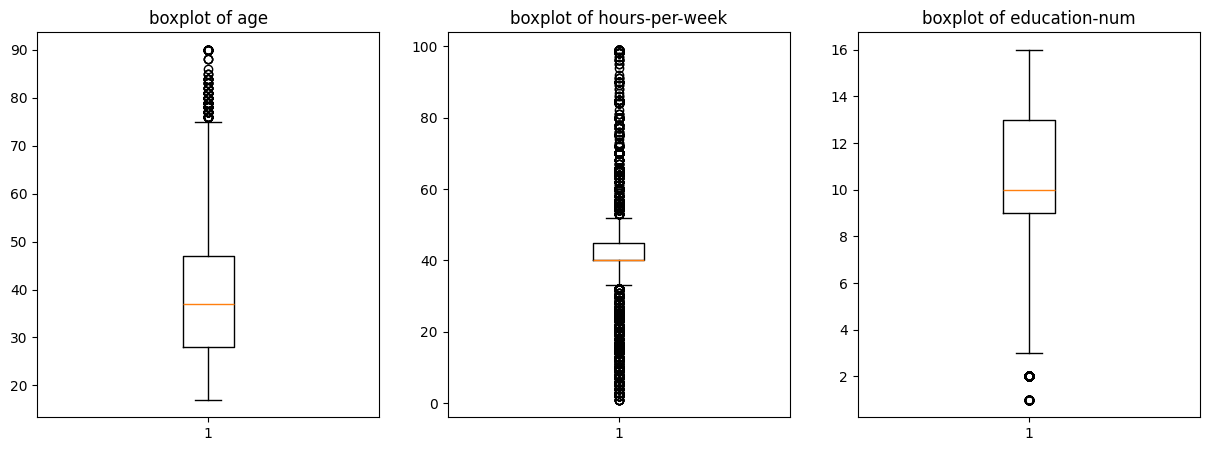

In [16]:
# display box plots that show the overall dispersion and skew
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].boxplot(adult_census_df["age"])
ax[0].set_title("boxplot of age")

ax[1].boxplot(adult_census_df["hours-per-week"])
ax[1].set_title("boxplot of hours-per-week")

ax[2].boxplot(adult_census_df["education-num"])
ax[2].set_title("boxplot of education-num")

plt.show()

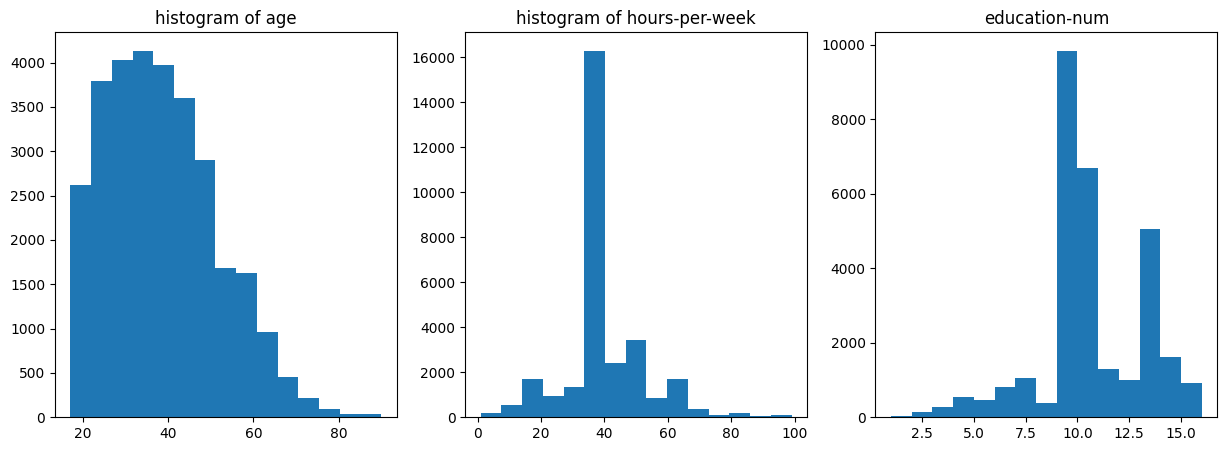

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(adult_census_df["age"], bins=15)
ax[0].set_title("histogram of age")

ax[1].hist(adult_census_df["hours-per-week"], bins=15)
ax[1].set_title("histogram of hours-per-week")

ax[2].hist(adult_census_df["education-num"], bins=15)
ax[2].set_title("education-num")

plt.show()

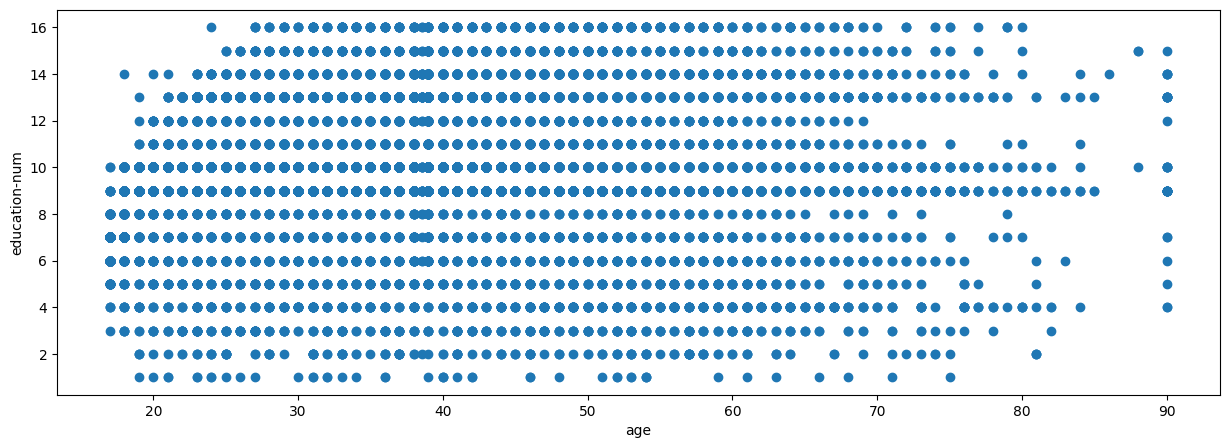

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(adult_census_df["age"], adult_census_df["education-num"])
plt.xlabel("age")
plt.ylabel("education-num")
plt.show()

_I created box plots which shows median age is around 37 years, it shows medium dispersion where 50% of the population falls under 28 to 48 years old, it also shows positive skewness since the upper whisker is longer which is also confirmed from the histogram. There are also outliers which shows there are significant people above 75 years of age which is older than the main population group._
_The hours-per-week shows median around 40 hours, it shows low dispersion where 50% of population work about 40 to 45 hours, it also shows very small positive skewness since the upper whisker is little longer which is also confirmed from the histogram. There are severe outliers on both ends which shows there are significant people who works less than 30 hours and even closer to 0 hours, whereas there are significant people who works more than 50 hours and even closer to 100 hours which are rare than the main population group._
_The education-num shows median around 10, it shows medium dispersion where 50% of population has education-num of 9 to 13, it also shows very small negative skewness since the lower whisker is little longer which is also confirmed from the histogram. There are few outliers which shows there are people whose education-num are 1 and 2, which is lower than the main population group._
_The age vs education-num scatter plot shows no strong linear relationship._


#### 4. **[10 pts]** Create bar charts for all the categorical attributes in the data that show the distribution of category frequencies (e.g., Male vs. Female for the _sex_ attribute, Private vs. Public vs. Self-emp, etc. for the **workclass** attribute, and so on).


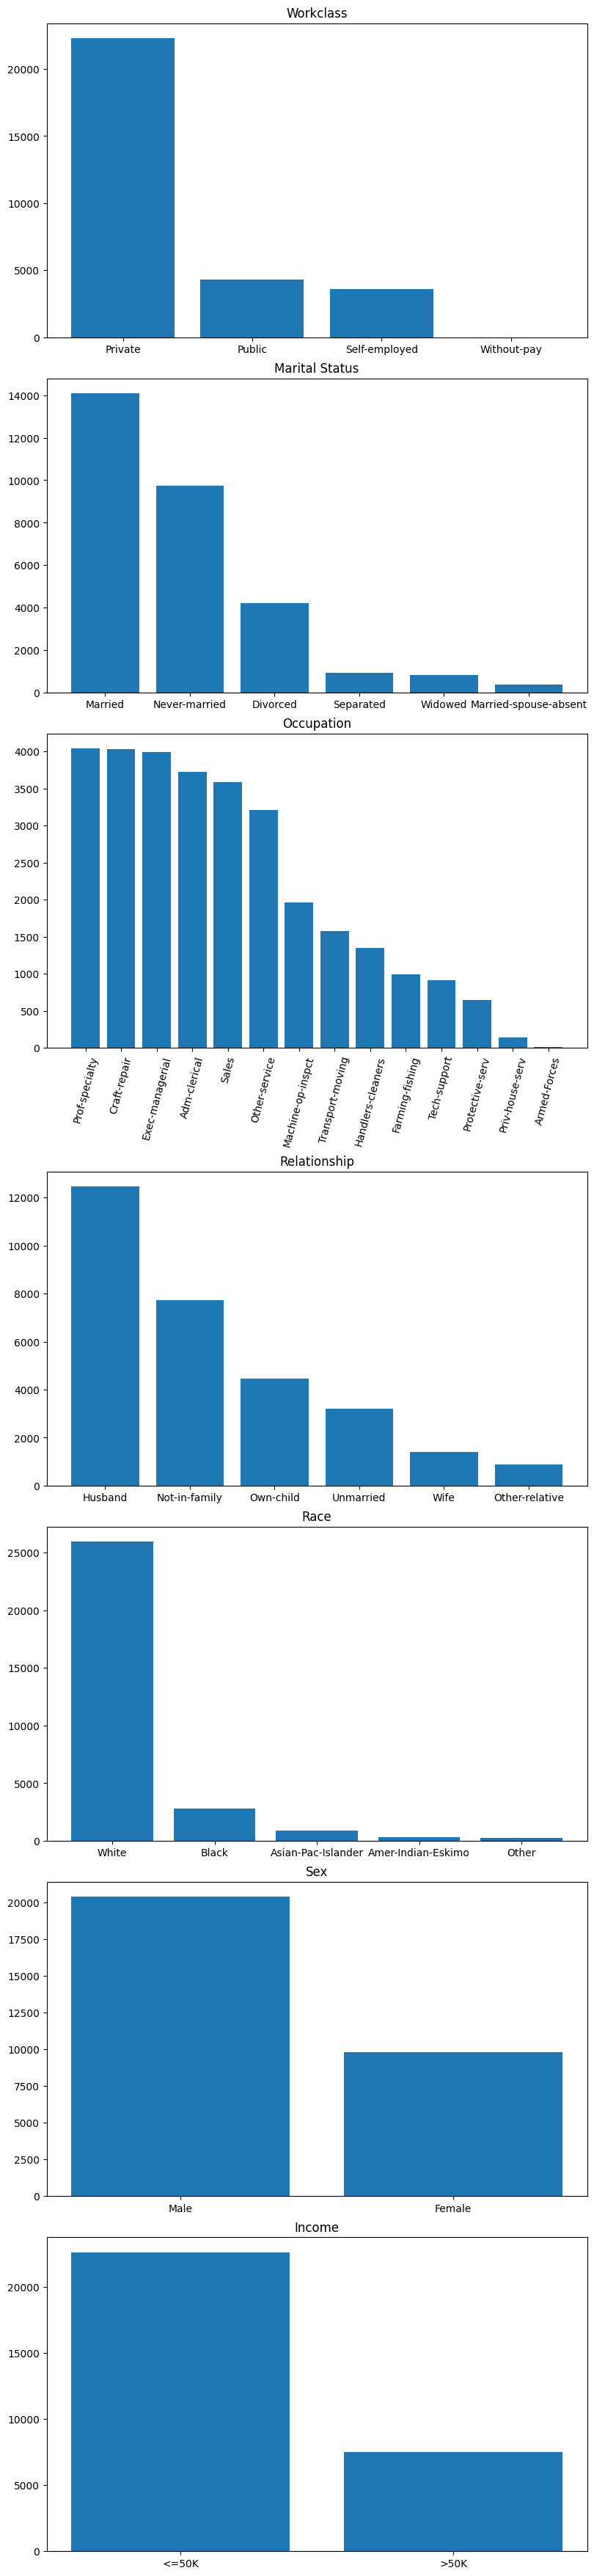

In [19]:
workclass_freq = adult_census_df["workclass"].value_counts()
marital_status_freq = adult_census_df["marital-status"].value_counts()
occupation_freq = adult_census_df["occupation"].value_counts()
relationship_freq = adult_census_df["relationship"].value_counts()
race_freq = adult_census_df["race"].value_counts()
sex_freq = adult_census_df["sex"].value_counts()
income_freq = adult_census_df["income"].value_counts()

fig, ax = plt.subplots(7, 1, figsize=(8, 35), constrained_layout=True)

ax[0].bar(workclass_freq.index, workclass_freq.values)
ax[0].set_title("Workclass")
ax[1].bar(marital_status_freq.index, marital_status_freq.values)
ax[1].set_title("Marital Status")
ax[2].bar(occupation_freq.index, occupation_freq.values)
ax[2].tick_params(axis="x", rotation=75)
ax[2].set_title("Occupation")
ax[3].bar(relationship_freq.index, relationship_freq.values)
ax[3].set_title("Relationship")
ax[4].bar(race_freq.index, race_freq.values)
ax[4].set_title("Race")
ax[5].bar(sex_freq.index, sex_freq.values)
ax[5].set_title("Sex")
ax[6].bar(income_freq.index, income_freq.values)
ax[6].set_title("Income")

plt.show()

_For each categorical attribute, I used the value_counts() method to extract frequency information. I then created bar charts for all attributes using the index and values to show category frequencies. The bar charts reveal that Private dominates the workclass category, most people are married, and the most common occupations are prof-specialty, craft-repair, and exec-managerial. Husband is the most common relationship type, White is the predominant race, Male is the predominant sex, and most people earn ≤50K._


#### 5. **[10 pts]** Perform a cross-tabulations of each of the **workclass** and **race** attributes with the **income** attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as **cross-tab()**, then either using Matplotlib directly or the **plot()** function in Pandas create the bar charts]. As an illustration, consider this example **graph depicting the cross-tabulation of sex with income** (Note: this example is based on a different data set, so yours will be different). In the case of **race** vs. **income** cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group.


In [20]:
cross_tab_workclass_income = pd.crosstab(
    adult_census_df["workclass"], adult_census_df["income"]
)
cross_tab_workclass_income

income,<=50K,>50K
workclass,,
Private,17410,4876
Public,2971,1318
Self-employed,2259,1314
Without-pay,14,0


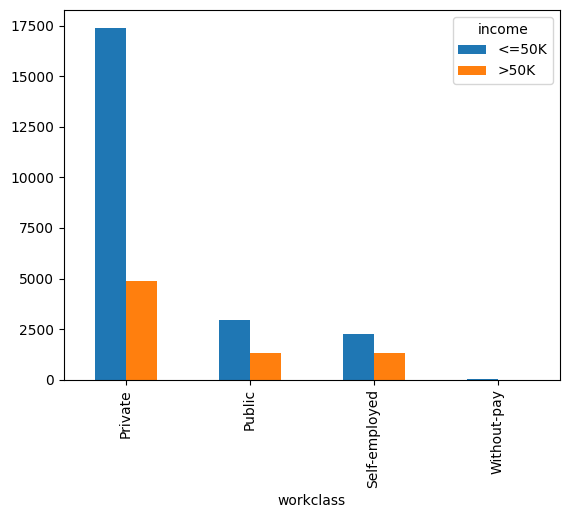

In [21]:
plt.show(cross_tab_workclass_income.plot(kind="bar"))

In [22]:
cross_tab_race_income = pd.crosstab(adult_census_df["race"], adult_census_df["income"])
cross_tab_race_income

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,647,248
Black,2451,366
Other,210,21
White,19094,6839


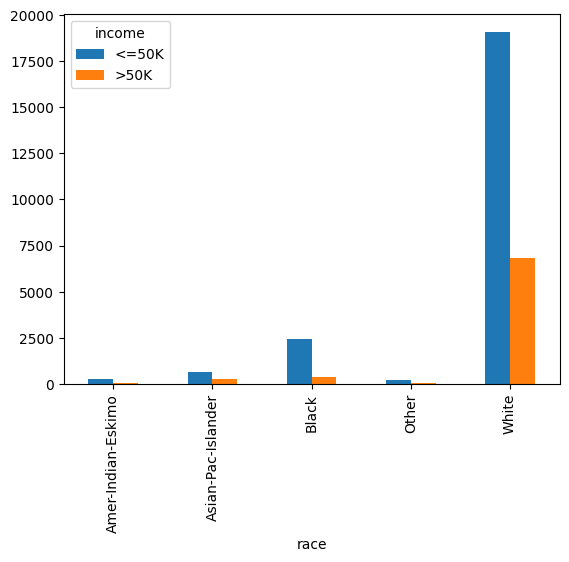

In [23]:
plt.show(cross_tab_race_income.plot(kind="bar"))

In [24]:
# chart comparing the percentages of each race category that fall in the low-income group
race_income_percent = (
    cross_tab_race_income["<=50K"] / cross_tab_race_income.sum(axis=1)
) * 100
race_income_percent

race
Amer-Indian-Eskimo    88.111888
Asian-Pac-Islander    72.290503
Black                 87.007455
Other                 90.909091
White                 73.628196
dtype: float64

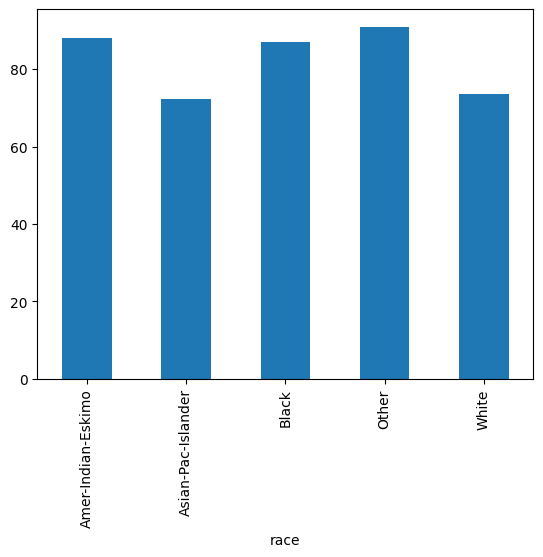

In [25]:
plt.show(race_income_percent.plot(kind="bar"))

_I created cross-tabulations of workclass and race attributes with the income attribute. The workclass vs. income cross-tabulation shows that the number of people earning ≤50K is significantly higher in each workclass category (private, public, self-employed, without-pay) compared to those earning >50K. Similarly, the race vs. income cross-tabulation shows that the number of people earning ≤50K is higher for each racial category than those earning >50K. Among low-income earners, the majority are from Other, Amer-Indian-Eskimo, and Black racial categories._


#### 6. **[10 pts]** Characterize the population group who work in the private sector and who have an education level of less than a bachelor's degree (i.e., **education-num** values of less than 13). You may consider first creating a separate dataframe consiting of this subset of the data. Then provide an analysis of the key chracteristics of this population group based on the statistics and data distributions of other attributes.


In [26]:
private_bachelor_df = adult_census_df[
    (adult_census_df["workclass"] == "Private")
    & (adult_census_df["education-num"] < 13)
]
private_bachelor_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40,<=50K
6,49.0,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,<=50K
10,37.0,Private,10,Married,Exec-managerial,Husband,Black,Male,80,>50K
13,32.0,Private,12,Never-married,Sales,Not-in-family,Black,Male,50,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,22.0,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,<=50K
32556,27.0,Private,12,Married,Tech-support,Wife,White,Female,38,<=50K
32557,40.0,Private,9,Married,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K


In [27]:
private_bachelor_df.describe(include="all")

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
count,17549.000000,17549,17549.000000,17549,17549,17549,17549,17549,17549.000000,17549
unique,NaN,1,NaN,6,13,6,5,2,NaN,2
top,NaN,Private,NaN,Married,Craft-repair,Husband,White,Male,NaN,<=50K
freq,NaN,17549,NaN,7078,2979,6191,14911,11302,NaN,14948
mean,36.264762,NaN,8.919768,NaN,NaN,NaN,NaN,NaN,39.366403,NaN
std,13.125882,NaN,1.851124,NaN,NaN,NaN,NaN,NaN,11.135493,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,25.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,39.000000,NaN
50%,34.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN


_After characterizing the population group working in the private sector with education levels below a bachelor's degree, I found that their average age is around 36 years, ranging from 17 to 90 years with a standard deviation of 13.12 years from the mean. Most people in this category are married, work in Craft-repair occupations, are predominantly Husbands in family relationships, and the majority earn ≤50K annually. The group is predominantly White males. They work approximately 39 hours per week on average, with working hours ranging from as low as 1 hour to as high as 99 hours per week, with a standard deviation of 11.13 hours._


#### 7. **[10 pts]** Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. As in the previous problem you may consider first creating separate subsets of the data based on these income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish between the two groups. You may use charts or plots for visualizing the differences in your analysis to support your observations. [**Note**: the discussion of your observations about the key characteristics will be a significant part of the score for this problem.]


In [28]:
low_income_df = adult_census_df[(adult_census_df["income"] == "<=50K")]
low_income_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39.0,Public,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50.0,Self-employed,13,Married,Exec-managerial,Husband,White,Male,13,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28.0,Private,13,Married,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32553,32.0,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,<=50K
32555,22.0,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,<=50K
32556,27.0,Private,12,Married,Tech-support,Wife,White,Female,38,<=50K
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K


In [29]:
low_income_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,22654.0,NaN,NaN,NaN,36.610004,13.45876,17.0,26.0,34.0,45.0,90.0
workclass,22654,4,Private,17410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,22654.0,NaN,NaN,NaN,9.629116,2.413596,1.0,9.0,9.0,10.0,16.0
marital-status,22654,6,Never-married,9256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,22654,14,Adm-clerical,3223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,22654,6,Not-in-family,6903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,22654,5,White,19094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,22654,2,Male,13984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,22654.0,NaN,NaN,NaN,39.348592,11.950774,1.0,38.0,40.0,40.0,99.0
income,22654,1,<=50K,22654,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
high_income_df = adult_census_df[(adult_census_df["income"] == ">50K")]
high_income_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
7,52.0,Self-employed,9,Married,Exec-managerial,Husband,White,Male,45,>50K
8,31.0,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,>50K
9,42.0,Private,13,Married,Exec-managerial,Husband,White,Male,40,>50K
10,37.0,Private,10,Married,Exec-managerial,Husband,Black,Male,80,>50K
11,30.0,Public,13,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,>50K
...,...,...,...,...,...,...,...,...,...,...
32538,38.0,Private,13,Divorced,Prof-specialty,Unmarried,Black,Female,45,>50K
32545,39.0,Public,12,Married,Adm-clerical,Wife,White,Female,20,>50K
32554,53.0,Private,14,Married,Exec-managerial,Husband,White,Male,40,>50K
32557,40.0,Private,9,Married,Machine-op-inspct,Husband,White,Male,40,>50K


In [31]:
high_income_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,7508.0,NaN,NaN,NaN,43.954068,10.262403,19.0,36.0,43.0,51.0,90.0
workclass,7508,3,Private,4876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,7508.0,NaN,NaN,NaN,11.60642,2.368423,2.0,10.0,12.0,13.0,16.0
marital-status,7508,6,Married,6409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,7508,14,Exec-managerial,1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,7508,6,Husband,5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,7508,5,White,6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,7508,2,Male,6396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,7508.0,NaN,NaN,NaN,45.70658,10.736987,1.0,40.0,40.0,50.0,99.0
income,7508,1,>50K,7508,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def visualize_attributes(low_df, high_df):
    col_num = len(low_df.columns)
    fig, ax = plt.subplots(col_num, 2, figsize=(12, 5 * col_num))
    for i, col in enumerate(low_df.columns):
        if low_df[col].dtype in ["int64", "float64"]:
            low_df[col].plot(kind="hist", ax=ax[i, 0])
            high_df[col].plot(kind="hist", ax=ax[i, 1])
            ax[i, 0].set_title(f"Low Income: Histogram of {col}")
            ax[i, 1].set_title(f"High Income: Histogram of {col}")
        else:  # Assuming categorical
            low_df[col].value_counts().plot(kind="bar", ax=ax[i, 0])
            high_df[col].value_counts().plot(kind="bar", ax=ax[i, 1])
            ax[i, 0].set_title(f"Low Income: Bar Chart of {col}")
            ax[i, 1].set_title(f"High Income: Bar Chart of {col}")
        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel("Count" if low_df[col].dtype == "object" else "Frequency")
        ax[i, 1].set_ylabel("Count" if high_df[col].dtype == "object" else "Frequency")
    plt.tight_layout()
    plt.show()

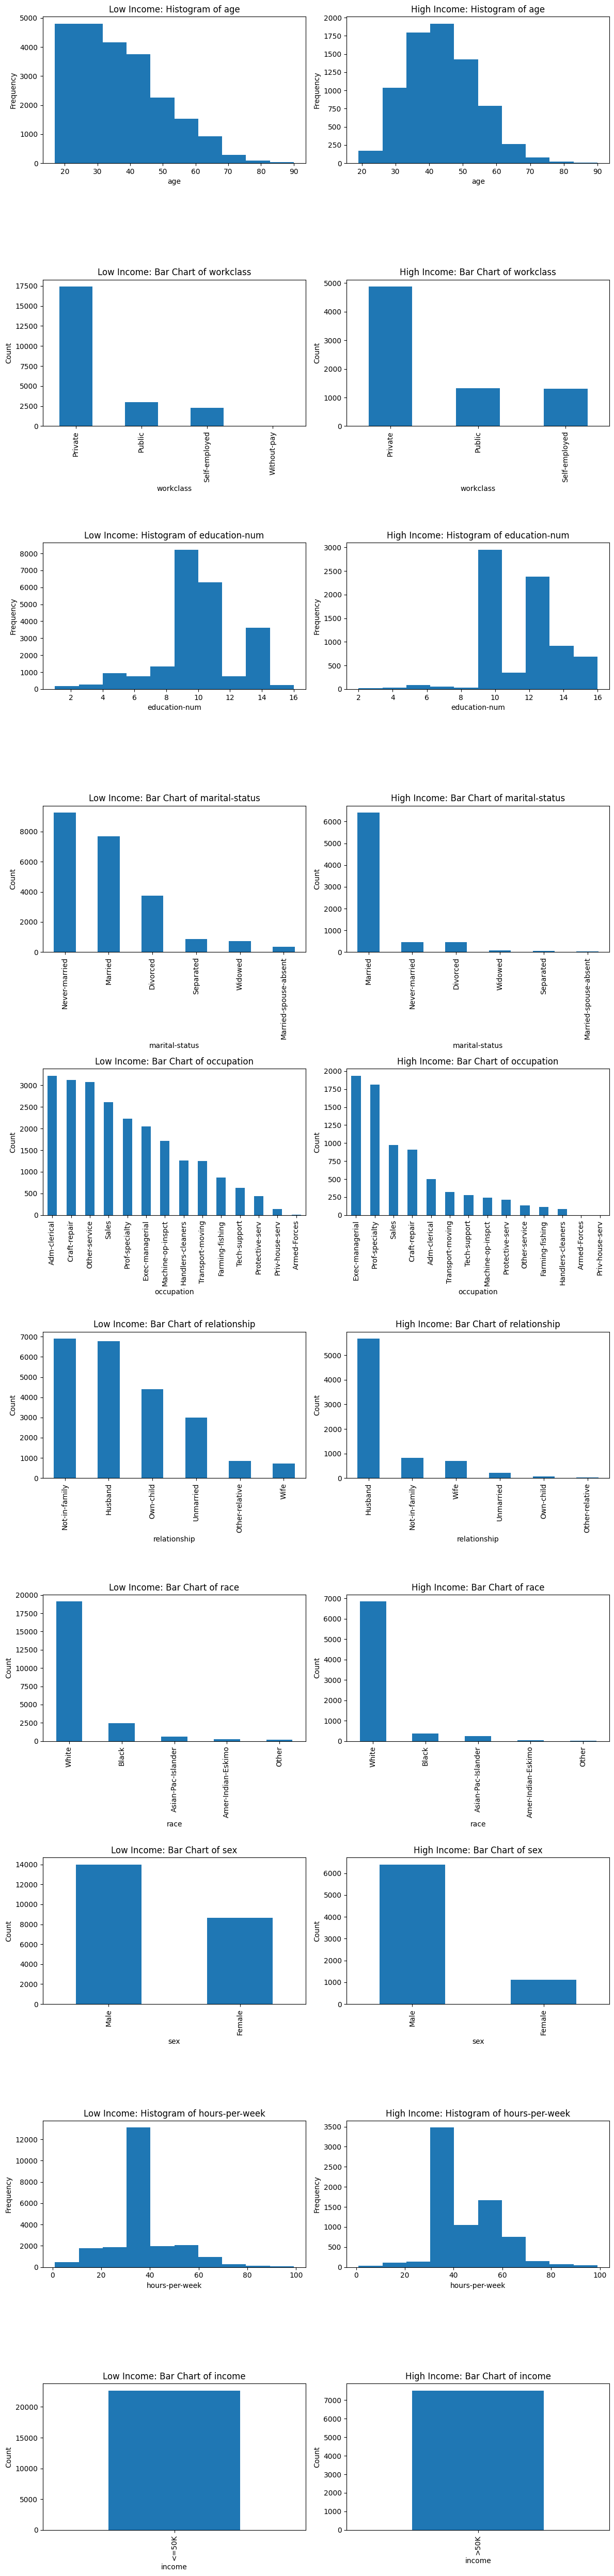

In [33]:
visualize_attributes(low_income_df, high_income_df)

_Comparing the characteristics of the low and high income categories across different attributes, we can see that most people who earn <=50K workclass is private, never-married, with Adm-clerical occupation, relationship Not-in-Family, and white male. They are around 36-37 years old who works around 39 hours per week and education is HS-grad or went to some college. Similarly, most people who earn >50K workclass is private, married, with Exec-managerial occupation, relationship Husband, and white male. They are around 44 years old who works around 46 hours per week and education is Assoc-voc or Assoc-acdm._
_I then created a function inspired from the example notebook from class, and edited to make it show the differences side by side. From the charts, we can see that most people with low income are generally younger, has lower education, never-married or married, with occupation Adm-clerical, Craft-repair, and Other-service. They also have relationship of not-in-family or a husband, mostly white male and works around 30 to 40 hours on average. Similarly, most of the high income people are generally older and in their 40s, has more advanced education, mostly married, with occupation Exec-managerial, and Prof-specialty. They also have relationship of Husband, mostly white male and works around 30 to 50 hours on average._


#### 8. **[10 pts]** Convert the data into the **standard spreadsheet format**. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called **adult_numeric.csv**.


In [34]:
std_format_df = pd.get_dummies(adult_census_df, dtype=int)
std_format_df.head(10)

,age,education-num,hours-per-week,workclass_Private,workclass_Public,workclass_Self-employed,workclass_Without-pay,marital-status_Divorced,marital-status_Married,marital-status_Married-spouse-absent,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
5,37.0,14,40,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
6,49.0,5,16,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7,52.0,9,45,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
8,31.0,14,50,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
9,42.0,13,40,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [35]:
std_format_df.to_csv("adult_numeric.csv", float_format="%1.2f")

_I used the get_dummies() function to convert each categorical attribute into multiple binary attributes, creating one binary column for each categorical value. Then, I used to_csv() to export the new dataframe as a CSV file._


#### 9. **[10 pts]** Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable). [**Hint**: you can create the correlation matrix by using the **corr()** function in Pandas or **corrcoef** function in NumPy]. Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to **education-num**. Repeat this step to display correlations with the attribute **income\_<=50K**. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.


In [36]:
corr_matrix = std_format_df.corr()
corr_matrix

,age,education-num,hours-per-week,workclass_Private,workclass_Public,workclass_Self-employed,workclass_Without-pay,marital-status_Divorced,marital-status_Married,marital-status_Married-spouse-absent,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.043928,0.101549,-0.210472,0.086183,0.191918,0.015344,0.135926,0.307250,0.015672,...,0.024364,-0.012673,-0.007027,-0.013963,-0.032365,0.026800,-0.081960,0.081960,-0.241891,0.241891
education-num,0.043928,1.000000,0.152522,-0.165069,0.157946,0.054259,-0.008872,-0.007471,0.080741,-0.040619,...,0.033640,-0.029340,0.062022,-0.074339,-0.049519,0.052615,-0.006157,0.006157,-0.335286,0.335286
hours-per-week,0.101549,0.152522,1.000000,-0.095533,-0.015255,0.147326,-0.014781,0.019875,0.223985,-0.009970,...,-0.060970,-0.004122,-0.006287,-0.060463,-0.006004,0.056404,-0.231268,0.231268,-0.229480,0.229480
workclass_Private,-0.210472,-0.165069,-0.095533,1.000000,-0.684885,-0.616636,-0.036249,-0.004491,-0.127509,0.007965,...,-0.020717,-0.016604,-0.002800,0.004821,0.028848,-0.005281,0.066803,-0.066803,0.117218,-0.117218
workclass_Public,0.086183,0.157946,-0.015255,-0.684885,1.000000,-0.149252,-0.008774,0.037999,0.009702,-0.003116,...,0.027499,0.028731,0.003207,0.067016,-0.018346,-0.061146,0.045832,-0.045832,-0.054968,0.054968
workclass_Self-employed,0.191918,0.054259,0.147326,-0.616636,-0.149252,1.000000,-0.007900,-0.034385,0.162532,-0.008230,...,-0.002704,-0.008342,-0.000013,-0.078874,-0.019259,0.073273,-0.140438,0.140438,-0.100748,0.100748
workclass_Without-pay,0.015344,-0.008872,-0.014781,-0.036249,-0.008774,-0.007900,1.000000,-0.008684,0.004510,0.011582,...,0.017139,-0.002108,0.005303,-0.001627,-0.001893,-0.000164,0.001511,-0.001511,0.012406,-0.012406
marital-status_Divorced,0.135926,-0.007471,0.019875,-0.004491,0.037999,-0.034385,-0.008684,1.000000,-0.377225,-0.044910,...,-0.089109,0.013857,-0.032712,0.019203,-0.010173,-0.001420,0.237452,-0.237452,0.132030,-0.132030
marital-status_Married,0.307250,0.080741,0.223985,-0.127509,0.009702,0.162532,0.004510,-0.377225,1.000000,-0.104317,...,0.236224,-0.016844,0.009409,-0.125279,-0.012105,0.108137,-0.436708,0.436708,-0.446110,0.446110
marital-status_Married-spouse-absent,0.015672,-0.040619,-0.009970,0.007965,-0.003116,-0.008230,0.011582,-0.044910,-0.104317,1.000000,...,-0.024642,0.013959,0.039088,0.020126,0.038579,-0.049553,0.044398,-0.044398,0.042562,-0.042562


In [37]:
corr_matrix["education-num"].sort_values(ascending=False)

education-num                           1.000000
occupation_Prof-specialty               0.427039
income_>50K                             0.335286
occupation_Exec-managerial              0.201806
workclass_Public                        0.157946
hours-per-week                          0.152522
marital-status_Married                  0.080741
relationship_Husband                    0.073645
race_Asian-Pac-Islander                 0.062022
occupation_Tech-support                 0.058569
relationship_Not-in-family              0.057331
workclass_Self-employed                 0.054259
race_White                              0.052615
age                                     0.043928
relationship_Wife                       0.033640
occupation_Sales                        0.025484
sex_Male                                0.006157
occupation_Protective-serv              0.003946
occupation_Armed-Forces                -0.000069
occupation_Adm-clerical                -0.001953
sex_Female          

In [38]:
corr_matrix["income_<=50K"].sort_values(ascending=False)

income_<=50K                            1.000000
marital-status_Never-married            0.320053
relationship_Own-child                  0.226186
sex_Female                              0.216699
relationship_Not-in-family              0.193258
occupation_Other-service                0.165934
relationship_Unmarried                  0.145799
marital-status_Divorced                 0.132030
workclass_Private                       0.117218
occupation_Adm-clerical                 0.099849
occupation_Handlers-cleaners            0.093836
race_Black                              0.088332
relationship_Other-relative             0.084457
occupation_Machine-op-inspct            0.075912
marital-status_Separated                0.074056
marital-status_Widowed                  0.059097
occupation_Farming-fishing              0.056483
marital-status_Married-spouse-absent    0.042562
occupation_Priv-house-serv              0.038618
race_Other                              0.032104
race_Amer-Indian-Esk

_I used the corr() function from pandas to create a correlation matrix and sorted correlations in descending order for education-num and income ≤50K. The analysis reveals that higher education levels are positively correlated with Prof-specialty occupations and income >50K. For income ≤50K and Other-service occupation, education-num shows low correlation, suggesting that lower education levels are associated with these categories. The correlation analysis for income ≤50K shows strong positive correlations with being never-married, having Own-child relationships, and being female. It shows negative correlations with being married or having Husband relationships._


#### 10. **[5 pts]** Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute or add the discretized age to the table. Create a new dataframe with the numeric and the discretized age attributes as two columns and display the top 10 rows of the new dataframe.


In [39]:
dis_age_df = std_format_df[["age"]].copy()
age_bins = pd.qcut(std_format_df.age, 3, labels=["young", "mid-age", "old"])
dis_age_df["age_bins"] = age_bins
dis_age_df.head(10)

,age,age_bins
0,39.0,mid-age
1,50.0,old
2,38.0,mid-age
3,53.0,old
4,28.0,young
5,37.0,mid-age
6,49.0,old
7,52.0,old
8,31.0,young
9,42.0,mid-age


_I copied the numeric age column into a new dataframe called dis_age_df, and used the pandas qcut() function to create 3 equal-sized categories (young, mid-age, old) for the age attribute. Then I used head(10) to display the top 10 rows of the new dataframe containing both the original numeric age and the discretized age attributes as two columns._


#### 11. **[10 pts]** Use **Min-Max Normalization** to transform the values of the attribute **education-num** the range 0.0- 1.0 (without changing the original data). Next, perform **zscore normalization** (on the original data) to standardize the values of all numeric attributes (**age, hours-per-week, education-num**). The latter step should be performed on all three attributes at the same time instead of one-by-one (you may wish to first create a separate dataframe with only these attributes and perform the operation on the whole dataframe. Note: for this problem, you should write your own code to perform the normalization; do not use pre-existing functions such as scikit-learn's MinMaxScaler(). Finally, show the top 10 rows of the three versions of the **hours-per-week** attribute (original, normalized, and standardized) side-by-side in a new dataframe.


In [40]:
# min-max normalization
max_edu_num = std_format_df["education-num"].max()
min_edu_num = std_format_df["education-num"].min()
edu_min_max_norm = pd.DataFrame(
    (std_format_df["education-num"] - min_edu_num) / (max_edu_num - min_edu_num)
)
edu_min_max_norm.head(10)

,education-num
0,0.800000
1,0.800000
2,0.533333
3,0.400000
4,0.800000
5,0.866667
6,0.266667
7,0.533333
8,0.866667
9,0.800000


In [41]:
# z-score standarization
z_score_std = std_format_df[["age", "hours-per-week", "education-num"]]
z_score_std = (z_score_std - z_score_std.mean()) / z_score_std.std()
z_score_std

,age,hours-per-week,education-num
0,0.042801,-0.077733,1.128900
1,0.880704,-2.331492,1.128900
2,-0.033372,-0.077733,-0.439731
3,1.109223,-0.077733,-1.224046
4,-0.795102,-0.077733,1.128900
...,...,...,...
32556,-0.871275,-0.244678,0.736742
32557,0.118974,-0.077733,-0.439731
32558,1.490089,-0.077733,-0.439731
32559,-1.252140,-1.747184,-0.439731


In [42]:
max_hrs_num = std_format_df["hours-per-week"].max()
min_hrs_num = std_format_df["hours-per-week"].min()
hrs_min_max_norm = (std_format_df["hours-per-week"] - min_hrs_num) / (
    max_hrs_num - min_hrs_num
)

org_norm_std = pd.DataFrame()
org_norm_std["original"] = std_format_df["hours-per-week"]
org_norm_std["normalized"] = hrs_min_max_norm
org_norm_std["standardized"] = z_score_std["hours-per-week"]
org_norm_std.head(10)

,original,normalized,standardized
0,40,0.397959,-0.077733
1,13,0.122449,-2.331492
2,40,0.397959,-0.077733
3,40,0.397959,-0.077733
4,40,0.397959,-0.077733
5,40,0.397959,-0.077733
6,16,0.153061,-2.081074
7,45,0.448980,0.339630
8,50,0.500000,0.756993
9,40,0.397959,-0.077733


In [43]:
std_format_df[["age", "hours-per-week", "education-num"]] = z_score_std[
    ["age", "hours-per-week", "education-num"]
]
std_format_df.head(10)

,age,education-num,hours-per-week,workclass_Private,workclass_Public,workclass_Self-employed,workclass_Without-pay,marital-status_Divorced,marital-status_Married,marital-status_Married-spouse-absent,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,0.042801,1.128900,-0.077733,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0.880704,1.128900,-2.331492,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
2,-0.033372,-0.439731,-0.077733,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1.109223,-1.224046,-0.077733,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4,-0.795102,1.128900,-0.077733,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
5,-0.109545,1.521057,-0.077733,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
6,0.804531,-2.008361,-2.081074,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7,1.033050,-0.439731,0.339630,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
8,-0.566583,1.521057,0.756993,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
9,0.271320,1.128900,-0.077733,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


_First, I manually created min-max normalization for the education-num attribute using the formula (x - min)/(max - min) and stored the results in a new variable. Then, I performed z-score standardization for age, hours-per-week, and education-num attributes using the formula (x - mean)/std and stored the results in a new dataframe. For the final comparison, I created min-max normalization for hours-per-week and displayed the original, normalized, and standardized versions side-by-side in a new dataframe to demonstrate the different scaling techniques._
